#Complex ML Pipelines
Made by: Wilfredo Aaron Sosa Ramos

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training the pipeline...
Accuracy: 0.9198

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96       980
           1       0.98      0.99      0.98      1135
           2       0.92      0.86      0.89      1032
           3       0.89      0.88      0.88      1010
           4       0.94      0.94      0.94       982
           5       0.92      0.93      0.92       892
           6       0.95      0.96      0.96       958
           7       0.88      0.91      0.89      1028
           8       0.90      0.85      0.87       974
           9       0.89      0.91      0.90      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



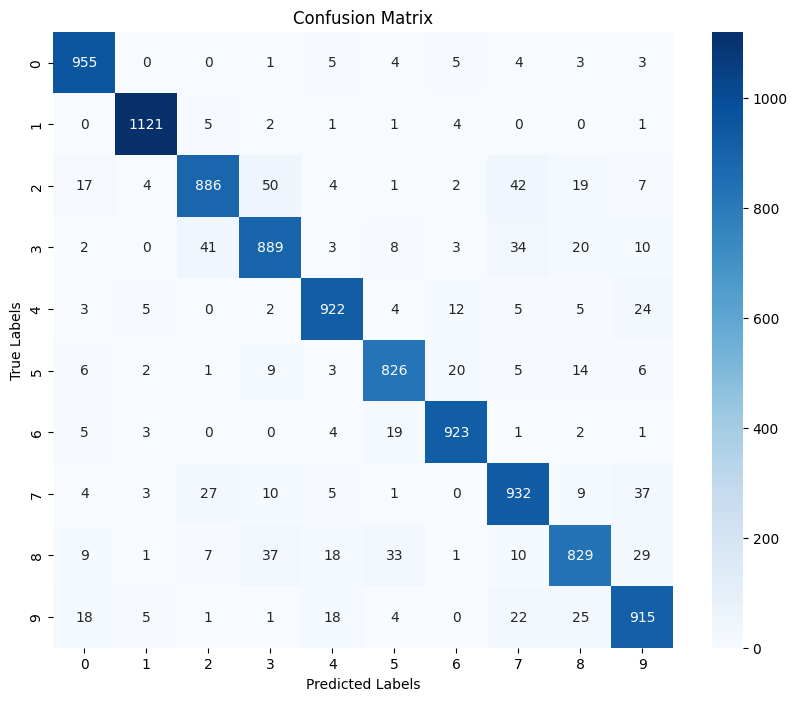

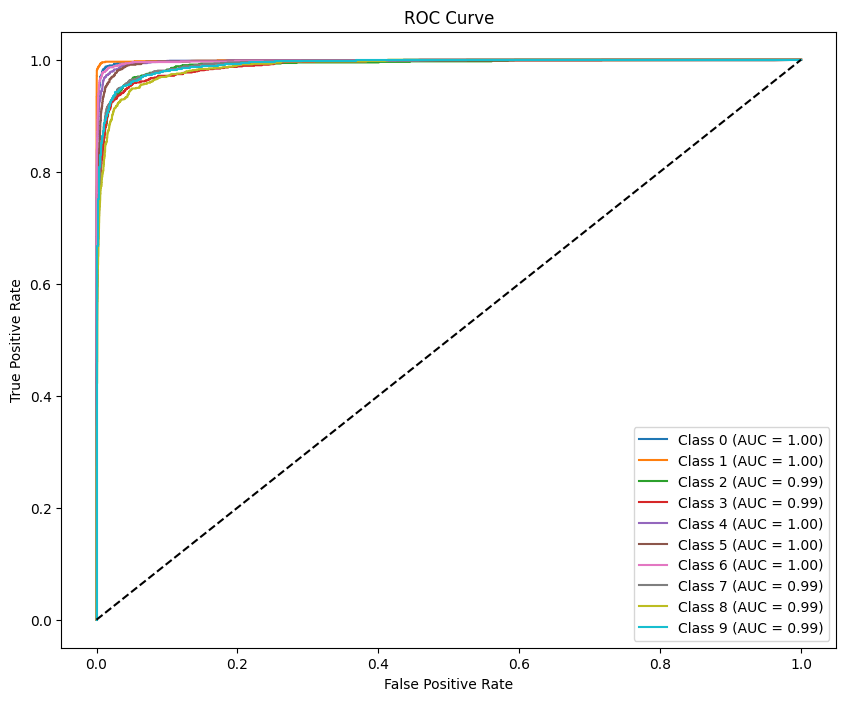

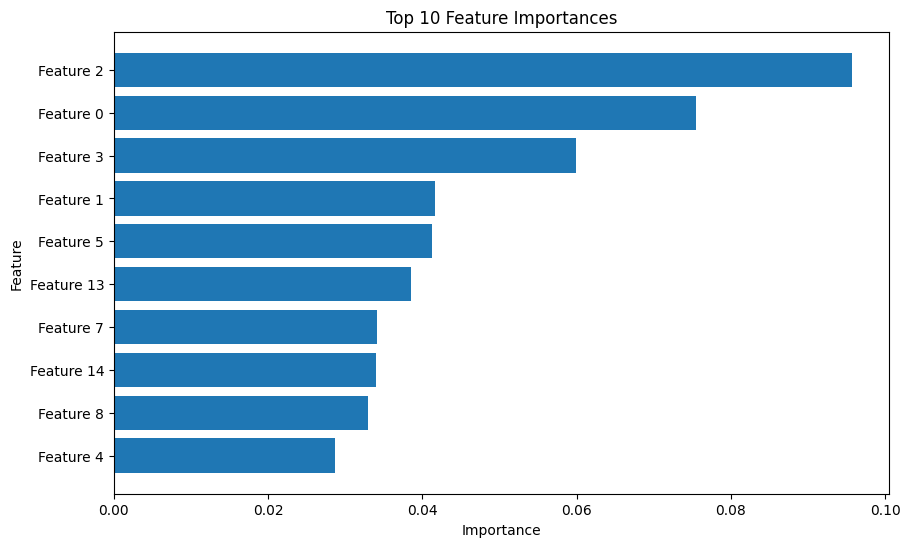

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from tensorflow.keras.datasets import mnist
import seaborn as sns
import joblib

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Flatten the images (28x28 -> 784)
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

# Normalize pixel values
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Define a column transformer for feature scaling
preprocessor = ColumnTransformer([
    ('standard_scaler', StandardScaler(), slice(0, 392)),
    ('minmax_scaler', MinMaxScaler(), slice(392, 784))
])

# Define a pipeline with preprocessing, dimensionality reduction, and classification
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=50)),
    ('classifier', RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42))
])

# Train the pipeline
print("Training the pipeline...")
pipeline.fit(x_train, y_train)

# Save the trained pipeline
joblib.dump(pipeline, 'mnist_pipeline.pkl')

# Make predictions
y_pred = pipeline.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# ROC Curve and AUC
if hasattr(pipeline.named_steps['classifier'], 'predict_proba'):
    y_score = pipeline.predict_proba(x_test)
    fpr = {}
    tpr = {}
    roc_auc = {}
    for i in range(10):
        fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_score[:, i])
        roc_auc[i] = roc_auc_score((y_test == i).astype(int), y_score[:, i])

    plt.figure(figsize=(10, 8))
    for i in range(10):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

# Feature importances (if applicable)
if hasattr(pipeline.named_steps['classifier'], 'feature_importances_'):
    importances = pipeline.named_steps['classifier'].feature_importances_
    indices = np.argsort(importances)[-10:]
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(indices)), importances[indices], align='center')
    plt.yticks(range(len(indices)), [f'Feature {i}' for i in indices])
    plt.title('Top 10 Feature Importances')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()